# Projeto II – Algoritmos de Substituição de Páginas

- **Objetivo**: Simular os algoritmos de substituição de páginas **FIFO**, **Segunda Chance**, **NUR** e **MRU**, e gerar um gráfico mostrando a quantidade de acertos para cada um destes algoritmos quando a quantidade de _frames_ da memória real varia.

## Entradas do Sistema:

- Nome do arquivo que contém o padrão de referências no formato abaixo:
  > 7W-2W-7R-4W-4R-2R-6R-6R-5W-2W-7R-0R-5W-6W-4R-5R-1R-1W-5W-

- Quantidade de frames da memória real [Q1, Q2]:
  - Para cada algoritmo, o programa deverá calcular a quantidade de acertos para cada um dos valores de Q1 a Q2, e a partir destes resultados gerar um gráfico.

- Quantidade de referências em que o _SO_ zera o **bit R** de todas as páginas.
  > Este parâmetro é utilizado pelos algoritmos **Segunda Chance** e **NUR**.


In [1]:
from fila_e_pagina import Fila
from algoritmos_de_swap import fifo, sc, mru, nur, DELTA_T

FRAME_RANGE = [50, 70, 90]
ALG_LIST = [fifo]

resultados = {s.__name__.upper():[] for s in ALG_LIST}
resultados['frames'] = FRAME_RANGE

# Pegando input do arquivo.txt
with open('./REFERENCIAS_1000.TXT') as file:
  txt = file.read().split('-')[:-1]

  for n_frames in FRAME_RANGE:
    for algoritmo in ALG_LIST:
      n_acerto = algoritmo(Fila(n_frames), txt)
      resultados[algoritmo.__name__.upper()].append(n_acerto)
      print(f'{algoritmo.__name__} com {n_frames} frames: {n_acerto} acertos')


fifo com 50 frames: 480 acertos
fifo com 70 frames: 662 acertos
fifo com 90 frames: 833 acertos


## Saídas:

O programa deverá gerar um gráfico com os resultados obtidos para todos os algoritmos.

O programa deverá também mostrar uma tabela contendo a quantidade de acertos de
todos os algoritmos.

    frames algoritmos  acertos
0       50       FIFO      480
1       70       FIFO      662
2       90       FIFO      833
3       50         SC      488
4       70         SC      666
5       90         SC      837
6       50        MRU      478
7       70        MRU      657
8       90        MRU      824
9       50        NUR      484
10      70        NUR      671
11      90        NUR      839


,frames,FIFO,SC,MRU,NUR
0,50,480,488,478,484
1,70,662,666,657,671
2,90,833,837,824,839


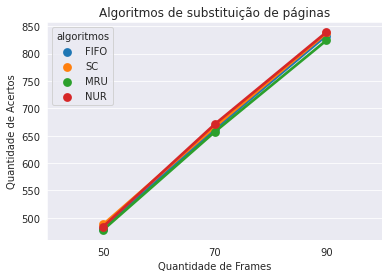

In [2]:
from pandas import DataFrame
from seaborn import pointplot, set_style

# Exemplo do professor
excel = {'frames':[50, 70, 90],
         'FIFO':[480, 662, 833],
         'SC':  [488, 666, 837],
         'MRU': [478, 657, 824],
         'NUR': [484, 671, 839]}

df = DataFrame(resultados if False else excel)
long_df = df.melt('frames', var_name='algoritmos', value_name='acertos')

# pointplot(data=df, hue='algoritmos')
print(long_df)

set_style('darkgrid')
pointplot(
  data=long_df,
  x='frames',
  y='acertos',
  hue='algoritmos'
  ).set(
    title='Algoritmos de substituição de páginas',
    xlabel='Quantidade de Frames',
    ylabel='Quantidade de Acertos'
    )

df